# A/B Testing

### Experimental Statistics

Say we have two versions of a product, say a website or a new feature, and we want to determine which is better. One way in which we can test changes on a web page is by running an experiment in which a *control group* see the old version while the *experiment group* sees the new version. Predefined *metrics* are then measured to determine which is more effective.

A/B testing is very much like hypothesis testing where $$\begin{align}H_0:&\quad\text{the new version is no better, or even worse, than the old version}\\ H_A:&\quad\text{the new version is better than the old version}\end{align}$$

##### Confounding Factors

**Change aversion** occurs when existing users may give an unfair advantage to the **old** version simply because they are unhappy with the change.

**Novelty effect** occurs when existing users may give an unfair advantage to the **new** version because they are drawn or excited to change.

### Example

Often times, companies use a UX funnel to drive their users to desired locations on their websites. In this example, the company is trying to build a more engaging design that will increase the number of users that explore there courses. We can take measurements using what is known as the *click through rate (CTR)*, which is the number of clicks divided by the number of views. To give us an even better statistic, we will use cookies to measure unique users so that we don't count the same user multiple times.

$$\text{CTR} = \frac{\text{\# clicks by unique users}}{\text{\# views by unique users}}$$

Our hypotheses can then be written as:

$$\begin{align}H_0:&\quad\text{CTR}_{\text{new}}\leq\text{CTR}_{\text{old}}\\ H_A:&\quad\text{CTR}_{\text{new}}\gt\text{CTR}_{\text{old}}\end{align}$$

or as is commonly written

$$\begin{align}H_0:&\quad\text{CTR}_{\text{new}}-\text{CTR}_{\text{old}}\leq 0\\ H_A:&\quad\text{CTR}_{\text{new}}-\text{CTR}_{\text{old}}\gt 0\end{align}$$

##### A/B Test - Home Page Actions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [ ]:
df = pd.read_csv('../../Data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [ ]:
print('Total number of actions: ', len(df))
print('Number of unique users: ', df['id'].nunique())
print('Control group size:', df.query('group == "control"')['id'].nunique())
print('Experiment group size:', df.query('group == "experiment"')['id'].nunique())

Total number of actions:  8188
Number of unique users:  6328
Control group size: 3332
Experiment group size: 2996


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
print('Experiment run time: ', df['timestamp'].max() - df['timestamp'].min())

Experiment run time:  115 days 16:41:40.789831


### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [ ]:
print('Unique actions: ', df['action'].unique())

Unique actions:  ['view' 'click']


### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer: The rate normalizes the comparison values in the event that the number of visitors in each group differs.

### 5. Define the click through rate (CTR) for this experiment.

Answer: $\text{CTR}=\frac{\text{\# clicks by unique viewers}}{\text{\# unique viewers}}$

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTR_{new} - CTR_{old} \leq 0$$
$$H_1: CTR_{new} - CTR_{old} \gt 0$$

### 7. What is the CTR for both the control and experimental groups?

In [ ]:
control_df = df.query('group == "control"')
control_ctr = control_df.query('action == "click"')['id'].nunique() / control_df['id'].nunique()
print('Control CTR: ', control_ctr)

experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query('action == "click"')['id'].nunique() / experiment_df['id'].nunique()
print('Experiment CTR: ', experiment_ctr)

# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr
print('Experiment CTR - Control CTR: ', obs_diff)

Control CTR:  0.2797118847539016
Experiment CTR:  0.3097463284379172
Experiment CTR - Control CTR:  0.030034443684015644


### 8. Is our finding significant? Use bootstrapping to determine.

In [ ]:
# Simulate sampling distribution for difference in proportions
diffs = []
for _ in range(10000):
    bootsamp = df.sample(df.shape[0], replace=True)
    control_df = bootsamp.query('group == "control"')
    experiment_df = bootsamp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"')['id'].nunique() / control_df['id'].nunique()
    experiment_ctr = experiment_df.query('action == "click"')['id'].nunique() / experiment_df['id'].nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([1.000e+00, 2.700e+01, 1.890e+02, 9.100e+02, 2.248e+03, 3.049e+03,
        2.308e+03, 9.950e+02, 2.420e+02, 3.100e+01]),
 array([-0.01671701, -0.00927348, -0.00182996,  0.00561357,  0.01305709,
         0.02050062,  0.02794415,  0.03538767,  0.0428312 ,  0.05027473,
         0.05771825]),
 <BarContainer object of 10 artists>)

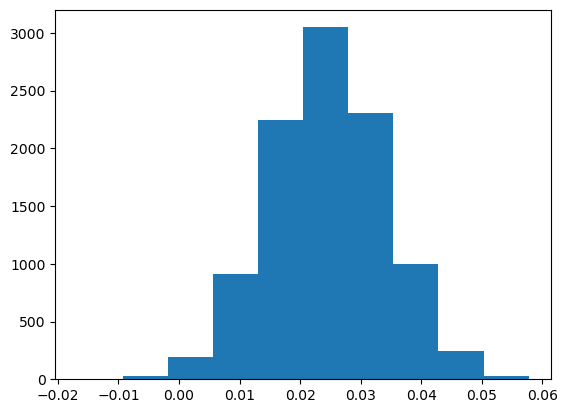

In [ ]:
plt.hist(diffs)

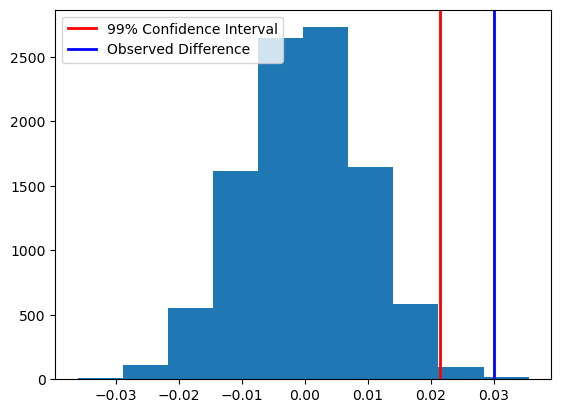

p-value:  0.0006


In [ ]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000) # 0 is the mean of the normal distribution you are choosing from H_0
plt.hist(null_vals)
plt.axvline(x=np.percentile(null_vals, 99), color='red', linewidth=2)
plt.axvline(x=obs_diff, color='blue', linewidth=2)
plt.legend(('99% Confidence Interval', 'Observed Difference'), loc='best')
plt.show()

# Compute p-value
print('p-value: ', (null_vals > obs_diff).mean())

With a p-value less than 0.01, it seems unlikely that our statistics is from the null. Thus, our finding is significant, and we reject the $H_0$.

### 9. What would you recommendation would you make based on this conclusion?

Answer: Implement the new (experiment) homepage.

### Further Examples

See these [examples](Examples\AB%20Testing) for further AB Testing scenarios given a change to our website.

### Multiple Tests

Remember, the more metrics you evaluate, the more likely you are to observe significant differences by chance, similar to the [previous lesson](5.%20Hypothesis%20Testing.ipynb) with multiple tests. Luckily, this [multiple comparisons problem](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) can be handled in several ways.

##### [Bonferroni Correction](http://en.wikipedia.org/wiki/Bonferroni_correction)

Given our original $\alpha = 0.05$, what would our new Bonferroni corrected $\alpha$ be considering we had four tests?  
Answer: $$\alpha_{new} = \frac{\alpha_{old}}{\text{\# tests}} = \frac{0.05}{4} = 0.0125$$

##### What results are still significantly significant?

Give $\alpha_{new}$, which of our results is still statistically significant? The below are the p-values we computed for each of our tests.

1. Enrollment Rate: $0.0242$
1. Average Reading Duration: $0$
1. Average Classroom Time: $0.0384$
1. Completion Rate: $0.0846$

Answer: Average Reading Duration

Since the Bonferroni method is too conservative when we expect correlation among metrics, we can better approach this problem with more sophisticated methods, such as the [closed testing procedure](http://en.wikipedia.org/wiki/Closed_testing_procedure), [Boole-Bonferroni bound](http://en.wikipedia.org/wiki/Bonferroni_bound), and the [Holm-Bonferroni method](http://en.wikipedia.org/wiki/Holm%E2%80%93Bonferroni_method). These are less conservative and take this correlation into account.

If you do choose to use a less conservative method, just make sure the assumptions of that method are truly met in your situation, and that you're not just trying to cheat on a p-value. Choosing a poorly suited test just to get significant results will only lead to misguided decisions that harm your company's performance in the long run.

### Difficulties in A/B Testing
Here are some common factors to consider when designing A/B tests and drawing conclusions based on its results.

* Novelty effect and change aversion when existing users first experience a change
* Sufficient traffic and conversions to have significant and repeatable results
* Best metric choice for making the ultimate decision (eg. measuring revenue vs. clicks)
* Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events.
* Practical significance of a conversion rate (the cost of launching a new feature vs. the gain from the increase in conversion)
* Consistency among test subjects in the control and experiment group (imbalance in the population represented in each group can lead to situations like [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox))